# One-Dimensional GAN
## Exercise M5, Visual Recognition, Master in Computer Vision
### Diego Porres, dporres@cvc.uab.es
Ph.D. Student, ADAS Research Group

# Introduction

[Generative Adversarial Networks](https://en.wikipedia.org/wiki/Generative_adversarial_network) or GANs for short are, without a doubt, one of the most widely known algorithms in Machine Learning nowadays. As you have seen in the lectures, GANs are a different type of models than the ones that one typically encounters. Being from the branch of [Unsupervised Learning](https://sites.google.com/view/berkeley-cs294-158-sp20/home), they are specifically tasked with learning an *implicit* representation of the training dataset distribution $p_\text{data}$. While a subfield of [generative modeling](https://en.wikipedia.org/wiki/Generative_model), they are not the only widely-used models from this field.

![Generative Models](https://user-images.githubusercontent.com/24496178/75723388-7ee94a00-5cdc-11ea-8132-9aa1b03d042b.png "Generative Models")
[Image Source](https://www.manning.com/books/gans-in-action)

GANs are a hot topic nowadays, especially since [Yann LeCun](http://yann.lecun.com/) said that GANs where the "most interesting idea in the last 10 years in ML" back in [2016](https://qr.ae/TQiKBM). A bold statement, but not a totally incorrect one. We can easily see how this is reflected within the research community when looking at the plot of the cumulative number of named GAN papers by month ever since:

![GANs are a hot topic](https://raw.githubusercontent.com/hindupuravinash/the-gan-zoo/master/cumulative_gans.jpg "GANs are a hot topic")
[Image Source](https://github.com/hindupuravinash/the-gan-zoo)

Perhaps what has truly astonished many is the ability to generate, in a completely unsupervised way, new images that should belong to a specific dataset distribution, such as human faces. Indeed, it seems like we have simply bypassed the [uncanny valley](https://en.wikipedia.org/wiki/Uncanny_valley) altogether, reaching quality levels (as we will see a glimpse shortly) that were never even dreamed of before.

While GANs aren't a new idea per se([O. Niemitalo's 2010-02-24 blog post](https://web.archive.org/web/20120312111546/http://yehar.com:80/blog/?p=167) and [J. Schmidhuber's 1992 paper](ftp://ftp.idsia.ch/pub/juergen/factorial.pdf) come to mind; read [this discussion](https://stats.stackexchange.com/questions/251460/were-generative-adversarial-networks-introduced-by-j%C3%BCrgen-schmidhuber) to better understand the history), they have become mainstream ever since [Goodfellow's paper in 2014](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf). It is the latter paper that will guide this notebook, so I hope you have the time to read it.


## But first, some of my favorite applications

GANs have been applied to many different fields apart from Computer Science, such as [art](http://www.aiartonline.com/), [image coloring and restoration](https://github.com/jantic/DeOldify), [image super-resolution](https://github.com/tensorlayer/srgan), and more. You have seen some examples in the class lectures, so I will proceed only with some of my favorites:

[Artbreeder](https://artbreeder.com/) is an excellent case for presenting the intersection between human creativity and technology. Using [BigGAN](https://arxiv.org/abs/1809.11096), [StyleGAN](https://arxiv.org/abs/1812.04948) and [StyleGAN2](https://arxiv.org/abs/1912.04958), it lets its users mix different images in order to get the trained network do the heavy lifting of generating the image and the user will have the task of selecting the ones that are closest to what they wish to accomplish. Even [full body characters](https://twitter.com/artbreeder/status/1210249276196040704?lang=en) can now be generated in the platform, as we can see in the following image.

![Artbreeder characters](https://user-images.githubusercontent.com/24496178/73453756-fbe77380-436c-11ea-929a-f17e7273a95c.png "Artbreeder characters")

Unsupervised generation of faces has seen some serious leaps in progress in the last couple of years. Looking at the image below, it is truly remarkable what has been achieved, even more when we consider the fact that this sample of faces do not include the latest development, the [StyleGAN2](https://arxiv.org/abs/1912.04958), where the authors have corrected some issues with the previous model SOTA, the [StyleGAN](https://github.com/NVlabs/stylegan) (rightmost face in the image below).

![4.5 year GAN progress](https://user-images.githubusercontent.com/24496178/75048968-add81280-54c9-11ea-9ea7-39dba36e7f52.png "4.5 year GAN progress")[Image Source](https://www.iangoodfellow.com/slides/)

Perhaps one of the most notorious use of this type of model is the website [thispersondoesnotexist.com](https://www.thispersondoesnotexist.com/) and my favorite variants, [thisvesseldoesnotexist.com](https://thisvesseldoesnotexist.com/) and [thiswaifudoesnotexist.com](https://www.thiswaifudoesnotexist.net/) (all of which either use StyleGAN or StyleGAN2). Each time you refresh the former, you will obtain a new image of a face/vessel/waifu that, as its name implies, does not exist. While certainly not as *creative* as Artbreeder, many of the generated samples are fun to observe, in a way making you an expert in detecting these fake versions. [Aydao](https://aydao.ai/), [Gwern](https://www.gwern.net) and [NearCyan](https://nearcyan.com/) have been hard at work and now have extended the capabilities of StyleGAN2 far beyond what has been previously possible [thisanimedoesnotexist.ai](https://thisanimedoesnotexist.ai/). For details on how they expanded StyleGAN2's capabilities, read [this blog post](https://www.gwern.net/Faces#extended-stylegan2-danbooru2019-aydao). Nothing quite like anime that will inspire reasearches into pushing the limits of SOTA algorithms.

For a more extensive list of similar websites like these ones, as well as other generative models, check out [thisrepositorydoesnotexist](https://github.com/paubric/thisrepositorydoesnotexist).




## So what's this notebook about?

Sadly, **we won't deal with image generation in this notebook**. I know this might come as a dissappointment for some, but it is my belief that it will be far more valuable for you to see how to train a simple GAN that tries to imitate one-dimensional data. While certainly the classical way to learn this subject is to, e.g., generate new [handwritten numbers](http://yann.lecun.com/exdb/mnist/), I've seen too many details being lost or overshadowed by the architecture of the networks themselves instead of concentrating more on the training loop and what your model is actually trying to accomplish.

Thus, in the broad scheme of things, the contents of this notebook are the following:

* A quick overview of random numbers (we will explain how this is related)
* The GAN training algorithm in pseudocode and code
* Exercises for you to complete and send to me
* (Appendices) How to sample from the latent space, why it's so hard to train a GAN, and how to evaluate one

All in all, we will be using `PyTorch`, so this notebook will also aim to help you cement your understanding of this library. Lastly, this notebook is a bit wordy, so use the Table of contents to the left to guide yourself.

# Theory - Intuition

We won't delve deep into the theory of GANs, as you can find this in the relevant papers and the class lectures. Instead, I wish to explain to you an equivalent way of understanding what GANs are actually doing. Note that if you prefer the way they were explained in the lecture, then feel free to skip to the **On To Programming** section ahead.

I hope I don't lose you in the following explanation, as this is the key for this whole shebang, so feel free to ask me any questions if some details lose you or are too murky to traverse. You can  find a bit more theory details in the Appendices below, but I again urge you to refer to the referenced papers or websites.

## On Random Numbers

Let us begin by asking a simple question: how are random numbers generated in your computer? In other words, [can a computer generate a pure random number?](https://engineering.mit.edu/engage/ask-an-engineer/can-a-computer-generate-a-truly-random-number/) Perhaps a completely unrelated question to ask, but bear with me for a moment, I assure you it will all make sense at the end.

In essence, computers have trouble generating [pure random numbers](https://www.random.org/). Instead, they have an easier task producing [pseudorandom numbers](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) via a specific algorithm, which are a sequence of numbers that approximate the properties of random numbers but are completely deterministic, so long as you have the seed that generated them. A [**seed**](https://en.wikipedia.org/wiki/Random_seed) is the number that starts the pseudorandom number generator algorithm, and I am sure you have encountered it once before, either in the form [`np.random.seed(seed)`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.seed.html) or [`random.seed(seed)`](https://docs.python.org/3/library/random.html#random.seed), or in popular games like [Minecraft](https://www.minecraft.net) that require a seed to generate a world.

Thus, when we use this seed, we will always generate the same sequence of random numbers thereafter, which is super useful for reproducing results. Let's look at a quick example: 

In [1]:
import random

# We set the seed:
random.seed(42)
# Let's print 5 uniformly distributed random numbers in [0, 1]:
print([random.uniform(0, 1) for _ in range(5)])

[0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124]


If we set the same seed again and generate 5 uniformly distributed random numbers in $[0, 1]$, we start to generate the same sequence as before:

In [2]:
random.seed(42)
print([random.uniform(0, 1) for _ in range(5)])

[0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124]


Of course, if we continue printing more numbers, we will generate new ones that we haven't seen before, unless we set the seed again:

In [4]:
print([random.uniform(0, 1) for _ in range(5)])

[0.21863797480360336, 0.5053552881033624, 0.026535969683863625, 0.1988376506866485, 0.6498844377795232]


[Many programmers have a preferred seed](https://blog.semicolonsoftware.de/the-most-popular-random-seeds/) that they always use for some reason, and as you will confirm in the code, I also have one of my own. Feel free to take a side in this pointless 'war', as we have all done before.



## Moving on to more complex distributions

Now, it's 'easy' to generate uniformly distributed random numbers in $[0,1]$ by using [`random.random()`](https://hg.python.org/cpython/file/376c2d81d0e2/Lib/random.py#l356) which in turn uses the [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister) as the pseudorandom number generator algorithm. What happens when we wish to generate (pseudo)random numbers with a more complex distribution like, say, the [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution)?

![Exponential Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Exponential_probability_density.svg/800px-Exponential_probability_density.svg.png "Exponential distribution")

Thanks to the [inverse transform method](http://www.columbia.edu/~ks20/4404-Sigman/4404-Notes-ITM.pdf), we can achieve just this! In concrete, we know we can generate random numbers $X$ with Cumulative Distribution Function or [CDF](https://en.wikipedia.org/wiki/Cumulative_distribution_function) $F_X$ via its *inverse CDF* $F_X^{-1}$. The process is as follows:

1. Generate $U\sim \mathcal{U}(0,1)$
2. Obtain $F_X^{-1}$
3. Compute $X=F_X^{-1}(U)$, and $X$ will have the desired distribution!

This might not be super clear, so here's an example on how to implement this:

> **Example**: Suppose we wish to generate random numbers $X$ that are exponentially distributed with $\lambda=0.5$, that is, $X\sim\text{Exp}(\lambda=0.5)$, as the <font color='orange'>orange</font> curve in the figure above. We then get a bunch of numbers $U$ that are uniformly distributed in $[0,1]$, and then pass them through the inverse CDF of the exponential distribution. Luckily, there is a closed form of $F_X^{-1}$, which is:

> $$ X=F_X^{-1}(U) = -\frac{1}{\lambda} \log{(1-U)}\sim\text{Exp}(\lambda) $$

In [5]:
import numpy as np

# 1. Get U, a bunch of uniformly distributed numbers in [0, 1]:
U = np.random.uniform(size=2000)

# 2., 3. Pass through the inverse CDF (which we know beforehand):
lambda_ = 0.5
X = - np.log(1 - U) / lambda_ # Note: we can also do: X = -np.log(U) / lambda_ ; why?

$X$ above will be exponentially distributed with $\lambda=0.5$. To really illustrate this, we can plot their distributions via a simple histogram, first of $U$:

In [ ]:
!pip install seaborn==0.10 # We need a previous version of Seaborn for the plots (restart the notebook when prompted)

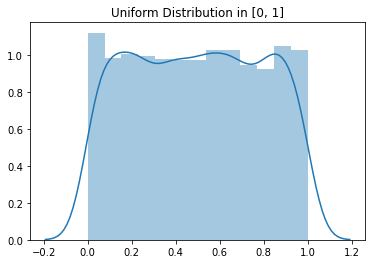

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.distplot(U, norm_hist=True, kde=True,
             rug = False, rug_kws={"alpha": 0.15})
plt.title('Uniform Distribution in [0, 1]')
plt.show()

And now of $X$, which has the expected exponential distribution:

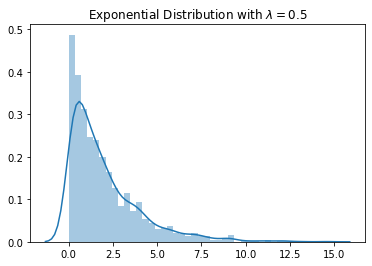

In [8]:
plt.figure(figsize=(6, 4))
sns.distplot(X, norm_hist=True, kde=True,
             rug=False, rug_kws={"alpha": 0.15})
plt.title(f'Exponential Distribution with $\lambda={lambda_}$')
plt.show()

Note that in both plots, the KDE is not really exactly what we expected, since it uses a smoothing function. The histogram does agree with our theoretical result, which is what we should focus on, as the KDE will be better used in the following sections.

## Higher Dimensional Random Numbers

So what is happening, why am I wasting your time talking about random numbers you might ask. Sadly for you, the main reason is because before starting my Ph.D., I actually studied Physics and Applied Mathematics, so I love subjects like this one. 

The second reason is a bit more warranted and  straightforward: we can represent images as a high-dimensional vector. Indeed, remember that each pixel has three channels (if we are working with RGB images that is), so we can see an image of size $224\times224\times3$ as being just a *massive* vector. 

With this in mind, we can generate a random image like so then:

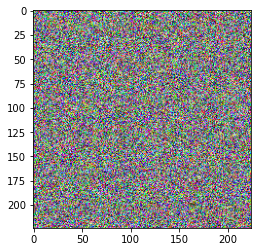

In [9]:
random_image = np.random.randint(low=0, high=255, size=(224, 224, 3))

plt.imshow(random_image)
plt.show()

Of course, reality is a bit more nuanced than that. Two things should be noted: ***first***, no matter how many times you run the above code, you won't generate any image that has any sort of significant structure (i.e., you won't be generating a person's face anytime soon). That is simply because the number of images that are gibberish is much, much larger than the number of meaningful images of the desired size $224^2$.

Indeed, how many *unique* images of size $224^2$ are there? Since each pixel has three channels and we continue to assume they are of 24 bits (each channel in the range 0 to 255), then the total number of unique images is:

$$(RGB)^{W\times H}=(256\times256\times256)^{224\times224} = (2^{24})^{50176} =2^{1204224}$$

An astronomically large number that makes the [$1.2$ trillion images taken in 2018](https://theconversation.com/of-the-trillion-photos-taken-in-2018-which-were-the-most-memorable-108815) pale in comparison. Given that we'll still be around the same order of magnitude in the current year (around $2^{40}$), we can see that just the number of possible images of size $224\times 224$ already overshadows the number of images taken per year. 

> As a side note, we should note that while the number of possible images of size $224^2$ is large, it is still a **finite** number nonetheless. To me it sort of begs the question: [is graphic art finite?](https://www.researchgate.net/profile/Kim_Williams10/publication/226211320_From_Tiling_the_Plane_to_Paving_Town_Square/links/0c9605375fd52b78fd000000/From-Tiling-the-Plane-to-Paving-Town-Square.pdf#page=30) Even [music isn't safe of this question either](https://youtu.be/DAcjV60RnRw), so we could honestly just ask if art is finite in and of itself. 

How is it possible then to take a random vector and produce with it an actual image, let alone an image with interesting features? The implausibility of this task may seem daunting, but there is a way...

This brings us to our ***second*** point: perhaps trying to generate any meaningful image of size $224^2$ is too broad, what if we make it more specific? More concretely, what if we focus on the images that are solely of _**dogs**_? We could imagine, then, that all these dog images exist in a subspace of the $2^{1204224}$ dimensional space that represents *all* the images of this size. We can use the following figure for guidance:

![Image Manifold](https://user-images.githubusercontent.com/24496178/75723169-0e422d80-5cdc-11ea-88e8-0c0685a07372.png "Image Manifold")
[Image Source](https://www.oreilly.com/library/view/generative-deep-learning/9781492041931/)

We can see that some areas of this high-dimensional space contain images of cars, others images of apples, and so on. The [Manifold Hypothesis](https://arxiv.org/abs/1310.0425) for our case will say as follows: there exists a lower-dimensional manifold that contains all the images of dogs, and this manifold is characterized by a distribution $p_{\text{dogs}}$. So if we are able to find this distribution, then we can simply sample from it and we'll have a brand new image of a dog!

Imagine, if you will, a *closed-form* equation for $p_{\text{dogs}}$. That is, an equation that perfectly describes the probability that an image $x$ of size $224^2$ is of a **dog**. A nigh impossible task you may say, and you may be right! However, we aren't interested in an ***explicit*** version of this probability distribution, just an ***implicit*** one so that we may sample from it, and we have just described such a mechanism above via the inverse transform method:

1. Generate a sequence of *easy* random numbers $U$, such as Uniformly or Normally distributed
2. Find $F_{\text{dogs}}^{-1}$
3. Get $X=F_{\text{dogs}}^{-1}(U)$, which should be a sequence of many images of dogs (if training proceeds as intended)!

Now we can just focus on one problem: how exactly will we find this inverse CDF, $F_{\text{dogs}}^{-1}$, in step 2 and then use it in step 3?  Writing such a function explicitly as the example we did before with the Exponential distribution seems, again, impossible. However, remember that neural networks are [universal function approximators](https://en.wikipedia.org/wiki/Universal_approximation_theorem), so they can be used exactly for this purpose!

Thus, this is the whole beauty of GANs: the Generator $G$ will act as $F_{\text{dogs}}^{-1}$, so we need only to feed it random vectors of our chosen *easy* distribution, and the output will be an image that should, hopefully, follow the distribution we wish, in this case of dogs:

$$G(z) = x \sim p_{\text{dogs}}$$

In short, we don't need to know the explicit form of this distribution, as the Generator will do it for us in an implicit way.

## A Game Theory Perspective

Alright, so how do we actually achieve this tremendous task? We start with a clever trick: from a Machine Learning perspective, we've usually dealt with [discriminative models](https://en.wikipedia.org/wiki/Discriminative_model) by training a Neural Network (Discriminator) in a Supervised Learning way. For example, if we wish to classify some images of handwritten numbers as being <font color='green'>Real</font> or <font color='red'>Fake</font>, we have the classical setting:

![A Discriminative network](https://user-images.githubusercontent.com/24496178/73466532-44f5f280-4382-11ea-9fc7-3dadeacda596.png "A Discriminative network")

The trick lies in adding another component into this scheme: another NN, the Generator. Why not let both of these networks compete with one another in a clever way, producing exactly the output that we are looking for?

![Typical GAN Architecture](https://user-images.githubusercontent.com/24496178/73466054-96ea4880-4381-11ea-9898-3e0dcbfaa451.png "Typical GAN Architecture")
[Image Source](https://www.freecodecamp.org/news/an-intuitive-introduction-to-generative-adversarial-networks-gans-7a2264a81394/)

Since we are pitting them against each other, the Generator $G$ will try to fool the Discriminator $D$ by generating *fake* data, whereas $D$ will try to distinguish the *real* from the *fake* data. As such, we will define a [minimax](https://en.wikipedia.org/wiki/Minimax) game or more specifically, a zero-sum game. That is, one player will wish to minimize the objective function, whereas the other player wishes to maximize it. 

Let us denote by $p_\text{data}$ the distribution of our dataset $x$, <font color='green'>$p_g$</font> the distribution of our generated data $G(z)$, and $p_z$ the distribution of our prior *easy* distribution $z$. As such, we will have that:

$$D:x\to[0,1] \qquad G:z\to x \qquad x\sim p_\text{data}, z\sim p_z$$

We use the following objective function explained in the lectures:

$$
V(D, G)=\mathbb{E}_{\boldsymbol{x} \sim p_{\mathrm{data}}(\boldsymbol{x})}[\log D(\boldsymbol{x})]+\mathbb{E}_{\boldsymbol{z} \sim p_{\boldsymbol{z}}}(\boldsymbol{z})[\log (1-D(G(\boldsymbol{z})))]
$$

Specifically, one player will seek to minimize it, while the other will seek to maximize it:

$$
\min_G \max_D V(D, G)= \min_G \max_D \mathbb{E}_{\boldsymbol{x} \sim p_{\mathrm{data}}(\boldsymbol{x})}[\log D(\boldsymbol{x})]+\mathbb{E}_{\boldsymbol{z} \sim p_{\boldsymbol{z}}}(\boldsymbol{z})[\log (1-D(G(\boldsymbol{z})))]
$$

> This makes sense in the following way: $D$ wants to distinguish between real and fake images, so then $D(x)$ should be close to $1$, whereas $D(G(z))$ should be close to $0$. On the other hand, since $G$ wishes to fool $D$, then it seeks to push $D(G(z))$ close to $1$, and we thus arrive at this minimax setting. Try plotting these functions to verify this conclusion.

Note that our objective is basically a saddle point, so the training will be extremely unstable. Indeed, training a GAN is challenging, and some caveats are discussed in the Appendices below.

![Game theory POV](https://user-images.githubusercontent.com/24496178/75048880-8a14cc80-54c9-11ea-87c1-f6e6abf4b82e.png "Game theory POV")
[Image Source](https://www.iangoodfellow.com/slides/)

This section is basically a summary of what is seen in the lectures, so consult those if you felt a bit lost here.

### On Training a GAN

Now, to conclude: our Generator will output data with a distribution <font color='green'>$p_{g}$</font>, but we wish this to be close to the real data, $p_\text{data}$. In the following image, we move to the right as training progresses, with <font color='blue'>$p_{d^*}$</font> being the discriminative distribution along the domain of $x$. **Take special attention, as this is the figure we will try to recreate in this notebook.**

![GAN Training Distribution](https://user-images.githubusercontent.com/24496178/73085503-1635d300-3ecf-11ea-85de-1514d8085c43.png "GAN Training Distribution")
[Image Source](https://arxiv.org/abs/1406.2661)

So, at the beginning (a), the distribution of the generated and real data is distant, but as training progresses, they will (hopefully) match, and our Discriminator kind of knows how to classify each point. In (b), we train $D$ and it converges to the optimal solution:

$$D^{*}(x)=\frac{p_\text{data}(x)}{p_\text{data}(x)+p_g(x)}$$

We see that <font color='blue'>$p_{d^{*}}$</font> reflects this. Then, in (c), we train the Generator using the signal from the Discriminator $D^{*}$ and see that the generated distribution gets pushed closer to the real distribution. 

We continue this process until we reach (d), where both distributions match perfectly and, if this is the case, $D^{*}(x)=1/2$ always (as $p_\text{data} = p_g$). In other words, $D$ won't be able to differentiate the generated from the real data, hence it will always output a probability of $1/2$ of the input being real, i.e. a coin flip!

This will almost never happen, but one can only dream. Therefore, be attentive whenever the Discriminator consistently outputs $1/2$, as it may have converged. For another more in-depth explanation on the topic, check [Colin Raffel's blog post](https://colinraffel.com/blog/gans-and-divergence-minimization.html).




# On To Programming

This notebook will assume you have used [`PyTorch`](https://pytorch.org/) before, or at least you are acquainted with it. Should a refresher be needed, check out this repository: [Grokking `PyTorch`](https://github.com/Kaixhin/grokking-pytorch).

Let's get down to business and load the pertinent packages we'll need from this section onward:

In [2]:
import torch
from torch import nn

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import shutil
import os

import time

from typing import Union, Tuple

The latter will be used for [type hints](https://www.python.org/dev/peps/pep-0484/), of which some find useful and others won't. I apologize if you find yourself in the latter group. We can get the `PyTorch` version that is installed (and is useful when installing the correct [CUDA toolkit](https://anaconda.org/anaconda/cudatoolkit) version if using a GPU) like so:

In [3]:
print(f'PyTorch version: {torch.__version__}')

PyTorch version: 1.10.2+cu113


The following cell will display a message only if you are using a GPU. In this notebook, a GPU won't be necessary (no *significant* speedup was observed due to the complexity and size of the data), but you are free to use one if you so wish:

In [4]:
if torch.cuda.is_available():
    n_gpu = torch.cuda.device_count()
    for i in range(n_gpu):
        high, low = torch.cuda.get_device_capability(i)
        print(f'GPU {i}, Device: {torch.cuda.get_device_name(i)}, Compute Capability: {high}.{low}')

    print(f'Current device: {torch.cuda.current_device()}') # CUDA devices start counting from 0

GPU 0, Device: NVIDIA GeForce GTX 1650, Compute Capability: 7.5
Current device: 0


You should expect the output to be `0`. In the future, if you are wishing to work with multiple GPUs such as in a server, perhaps [this guide](https://pytorch.org/tutorials/beginner/former_torchies/parallelism_tutorial.html) will be of your interest.

In any case, we will be using either `cpu` or `cuda` (GPU), so we can define our `device` like so:

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Device: {device}')

Device: cuda


We will be allocating our models and data to this `device`, so don't forget it!

# The Training Data

Let's get some training data. We can of course get some one-dimensional data from the wild and try to mimic it; however, it's best to be able to easily define the data and know beforehand what to expect in order for the whole GAN training loop to become familiar. 

This is exactly what we will do: our data will be drawn from a Gaussian distribution with mean $\mu=4.0$ and standard deviation $\sigma=0.5$. In other words, $p_{\text{data}}=\mathcal{N}(4.0, 0.5^2)$. Let's go ahead and create this dataset.

## [Normal Distribution](https://pytorch.org/docs/stable/distributions.html#normal): $p_{\text{data}}=\mathcal{N}(\mu, \sigma^2)$

The following class definition is not really necessary, but it makes it easier to modify the values of the mean $\mu$ and standard deviation $\sigma$ of our data. Likewise, at the end of the notebook you'll have other more complex distributions to choose from, all of which follow this same structure, so this will make it easier to understand those other distributions.

In [6]:
class NormalDistribution:
    def __init__(self, mu=4.0, sigma=0.5):
        self.mu = torch.tensor([mu])
        self.sigma = torch.tensor([sigma])

    def sample(self, N, seed=42):
        # Set the seed for reproducibility:
        torch.manual_seed(seed)
        # Define the distribution:
        if N is None:
            N = 1
        m = torch.distributions.normal.Normal(loc=self.mu, scale=self.sigma)
        samples = m.sample([N])
        return samples

Then, we will simply use the `sample` method in order to obtain the correct quantity of data points we wish to use by simply setting `N`. For now, let's use `N=10000`, with the defined mean and variance we had discussed before:

In [7]:
data = NormalDistribution().sample(10000)

print(data.shape)

torch.Size([10000, 1])


We now calculate the mean and standard deviation of the `data`. While we know the *real* mean and standard deviation of our data distribution, namely $\mu=4$ and $\sigma=0.5$, at the end the Generator will only have access to the `data` we feed it and will try to approximate this sample's parameters. We will then calculate this sample mean and standard deviation and store them in the variables `actual_mean` and `actual_std`, to be used for some plotting later on:

In [8]:
actual_mean = torch.mean(data)
actual_std = torch.std(data)

print(f'Data mean: {actual_mean:.4f}, standard deviation: {actual_std:.4f}')

Data mean: 4.0032, standard deviation: 0.5022


We can see that they don't differ by much from the actual ones, but it's best to keep them stored to better visualize what the Generator is trying to approximate.

Now, let's plot this data: we will use a [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) from [`Seaborn`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to better visualize the distribution of the data, along with a histogram in the background. We also plot the individual datapoints in the bottom as a [rugplot](https://seaborn.pydata.org/generated/seaborn.rugplot.html), resulting in:

In [9]:
plt.figure(figsize=(8, 6))
sns.distplot(data, 
             norm_hist=True,
             rug=True,
             kde_kws={"color": "k", 
                      "label": "Data Distribution",
                      "linestyle":":",
                      "linewidth": 3},
             rug_kws={"alpha": 0.15})
plt.show()

Error: Canceled future for execute_request message before replies were done

The data seems to be exactly what we expected: a normal distribution centered at $4.0$ with variance $\sigma^2=0.25$. Of course not a perfect Gaussian curve, but close enough.

## DataLoader

In general, we won't be using all our training data at the same time, but partition it into **batches**. Remember that it is advisable to have the **batch size** to be a [power of 2](https://datascience.stackexchange.com/a/20193) to fully use the power of your GPU (or, depending on your architecure, even a [power of 8](https://devblogs.nvidia.com/optimizing-gpu-performance-tensor-cores/)). 

Let's use `batch_size = 1024`, but this can be easily modified whenever you so wish:

In [ ]:
batch_size = 1024

> Even though `1024` is a power of 2, I just want to note that generally in Deep Learning, we should have [$2\leq \texttt{batch_size}\leq32$](https://arxiv.org/abs/1804.07612). The good/bad news is we aren't really going to do ***Deep*** Learning in this notebook, plus our data is extremely simple. As such, using a small batch size won't really help us, and I hope you try this later on. On the other hand, it is not unfeasible to go for larger batch sizes than $32$, which is what the authors of [BigGAN](https://arxiv.org/abs/1809.11096) showed in the paper.

### Data Transformations

When you typically load your dataset with `PyTorch`, you should do so with some [transformations](https://pytorch.org/docs/stable/torchvision/transforms.html): `.ToTensor()`, `Normalize()` are perhaps the most important, but of course there are many more. Look into [this guide](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) for writing more custom transformations. 

This is a classical preprocessing step, moreso when your dataset consists of images that you wish to resize, crop, rotate, etc. (typically done so that your model is better able to generalize). Take note that you shouldn't be rotating or randomly cropping for GANs applied to images; it is only common to [mirror-flip at most](https://github.com/NVlabs/stylegan2#training-networks). This is because some datasets only make sense when they're upright (e.g., human faces) or cropped at specific places (such as the center of the image). However, this also depends on your dataset, so don't let me stop you from trying other approaches. This is different than the *dataset augmentations* that have appeared for training GANs with small datasets (such as [StyleGAN2-ADA](https://arxiv.org/abs/2006.06676) or [bCR/zCR](https://arxiv.org/abs/2002.04724)), as these have to be carefully applied so as to not to leak to the Generator, so don't confuse these.

A quick example of using the transformations: the next code block would first transform our image data (as it consists of `NumPy` arrays) to a Tensor, and then normalize it by using a per-channel mean and standard deviation (in the strict definition of the word, what we are doing here is [standardization](https://en.wikipedia.org/wiki/Standard_score), but who am I to rename things at this point?): 

```python
data_transforms = transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=(mean1, mean2, mean3), std=(std1, std2, std3))
                                      ])
```

An interesting discussion on both how to calculate the mean and standard deviation of your dataset can be found [here](https://discuss.pytorch.org/t/about-normalization-using-pre-trained-vgg16-networks/23560). Make sure to read the full thread, as well as the revisions made to the accepted answers.

We won't be using any transformations, so we can get our [`dataloader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) like so:

In [ ]:
dataloader = torch.utils.data.DataLoader(data, 
                                         batch_size=batch_size, 
                                         shuffle=True) # !!!

`shuffle=True` is crucial, when we don't wish to somehow leak information to our model, should our dataset be neatly separated in different subdirectories. This is not the case here, but it won't hurt our results.

We will *iterate* through the `dataloader`, getting a fresh batch of random data of size `batch_size`, up until the last batch which should have a size of `1024*(10000/1024-10000//1024)=784`. In order to get a batch, we can simply create an iterator object via [`iter`](https://docs.python.org/3.8/library/functions.html#iter) and load the `.next()` batch like so:

```python
dataiter = iter(dataloader)
x = dataiter.next()
```

It is more usual to [`enumerate`](https://docs.python.org/3/library/functions.html#enumerate) the batches, like we do next when plotting them. Note that we can see that the expected Gaussian $\mathcal{N}(4, 0.25)$ can be somewhat inferred per batch.

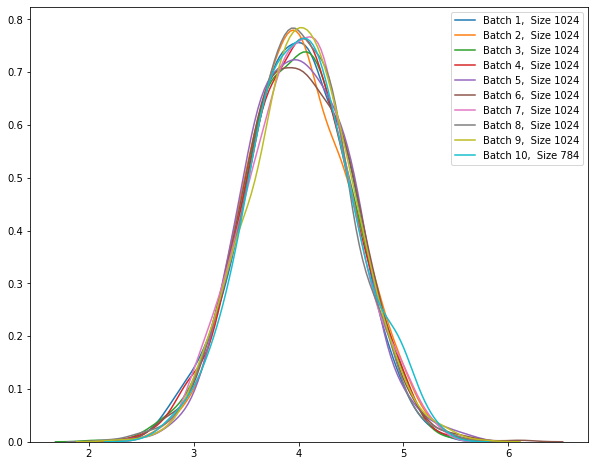

In [ ]:
plt.figure(figsize=(10, 8))
for i, d in enumerate(dataloader):
    label = f'Batch {i + 1},  Size {len(d)}'
    sns.distplot(d, hist=False, kde=True, label=label)
plt.show()

> A caveat: with images, we will of course use smaller batches, and each of these batches won't necessarily represent the general distribution of our dataset. You can imagine this while picturing our previous dataset of dogs: some batches might be of one specific breed, others might be of mixed breeds, so our statistics may be all over the place!

> We harken back to [BigGAN](https://arxiv.org/abs/1809.11096): the authors noted that large batches helped produce better quality images. Indeed, their batch size was $256$ with $8$ gradient accumulations, translating into a batch size of $2048$. Using 8 [V100](https://www.nvidia.com/en-us/data-center/v100/) GPUs, it takes the model [15 days of training time](https://github.com/ajbrock/BigGAN-PyTorch#how-to-use-this-code) to reach the desired number of iterations. As such, this is why only companies like Google are able to train such a monstruous model.

# Generator

Finally, we will start with our neural network coding. Remember that the input of the Generator will be a simple random vector, so we must first define this vector space, which we will do next:

## The latent space $\mathcal{Z}$

In the literature, this *easy* vector space from which we take the simple random vectors is called the **latent space**. Historically, the random vectors being used were Uniformly distributed, but nowadays it is common for them to be Normally distributed, that is, $p_z = \mathcal{N}(0,1)$.

Thus, the only thing to define is the dimensionality of this vector space, or $|\mathcal{Z}|$. Typically, the more complicated the task, the higher this dimension. For example, the [DCGAN](https://arxiv.org/abs/1511.06434) used $|\mathcal{Z}|=100$, and it set the standard that many GAN architectures used thereafter: in some cases, unnecessary, in others, not complex enough.

For our case, since we are dealing with simple one-dimensional data, we won't be needing such a high number. Let's stick with $|\mathcal{Z}|=5$ and see how this works for us:

In [ ]:
latent_dim = 5

Let's define a function that will make it easy for us to produce a random set of latent vectors:

In [ ]:
def get_latents(N: int, latent_dim: int) -> torch.Tensor:
    size = (N, latent_dim)
    latents = torch.randn(*size, device=device)
    return latents

A classical question to ask yourselves is: how do you know whether or not $G$ is indeed generating better outputs as training progresses? Can we rely solely on the losses of our networks? There is an indirect solution: fix a set of latent vectors, which we will call `fixed_latent` and we'll leave unchanged, and see how the output `G(fixed_latent)` evolves over time:

In [ ]:
fixed_latent = get_latents(N=batch_size, latent_dim=latent_dim)
print(fixed_latent.shape)

torch.Size([1024, 5])


We will pass these fixed latent vectors through $G$, (hopefully) producing better and better results as training progresses. 

For generating images, this process will be more intuitive: at the beginning we will see that the Generator produces nonsense, but as training progresses, the generated images will get closer and closer to the ones we wish to generate. For example, in the following GIF, a GAN is trying to generate new MNIST numbers:

![DCGAN MNIST training](https://raw.githubusercontent.com/znxlwm/tensorflow-MNIST-GAN-DCGAN/master/MNIST_DCGAN_results/MNIST_DCGAN_generation_animation.gif "DCGAN Mnist training")
[Image Source](https://github.com/znxlwm/tensorflow-MNIST-GAN-DCGAN)

This type of visualization only makes sense if we are using the same latent vector for each image, so keep this in mind!

Another example is the following video I set up for you, of which I explain a bit better in the Appendices. In this video, we see how the image generation evolves for a StyleGAN2:

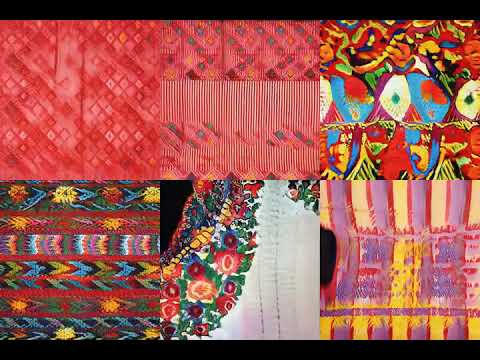

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('W2gboP-Xmgs') 

## The Generator

Now, finally we define our Generator! It will be a simple network, as our real data is also very simple. It will have `1` hidden layer, with `15` hidden neurons, with `1` output (as our real data is one-dimensional):

In [ ]:
class Generator(nn.Module):
    def __init__(self, latent_dim=latent_dim, hidden_dim: int = 15, output_size: int = 1):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # Input is the latent vector (ReLU output)
            nn.Linear(in_features=latent_dim, out_features=hidden_dim),
            # We use ReLU nonlinearity:
            nn.ReLU(inplace=True),
            # Hidden layer (linear output)
            nn.Linear(in_features=hidden_dim, out_features=output_size)
        )

    def forward(self, x):
        return self.main(x)

For our ReLU function, we don't wish to make a copy of the weights, so instead we have modified the values in-place via [`inplace=True`](https://discuss.pytorch.org/t/whats-the-difference-between-nn-relu-and-nn-relu-inplace-true/948). Be careful of not using other in-place operations (such as `out += res` in `forward`), as there will be errors. See [here](https://github.com/pytorch/pytorch/issues/5687) for a discussion on this topic.

Let's get our `generator` and print it:

In [ ]:
generator = Generator(hidden_dim=15).to(device)

print(generator)

Generator(
  (main): Sequential(
    (0): Linear(in_features=5, out_features=15, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=15, out_features=1, bias=True)
  )
)


The parameter values of our model can also be printed like so (though this is not advisable for more complex networks):

In [ ]:
for i, param in enumerate(generator.parameters()):
    print(param.size())
    print(param.data)

torch.Size([15, 5])
tensor([[-0.4230, -0.0055, -0.0199,  0.3791, -0.3773],
        [ 0.0022,  0.3484,  0.0517, -0.0117, -0.3996],
        [-0.3398, -0.1357, -0.3719,  0.1674,  0.1346],
        [-0.3763,  0.4431,  0.0514,  0.2941, -0.1672],
        [ 0.3701,  0.3756, -0.3968, -0.1806, -0.3231],
        [-0.0029, -0.3029, -0.1903,  0.1646,  0.2050],
        [ 0.3428,  0.4067,  0.1437, -0.0942,  0.0958],
        [ 0.4236,  0.4253, -0.4444,  0.4037, -0.1377],
        [-0.1531, -0.3988,  0.2332,  0.1331,  0.3094],
        [-0.2300,  0.2981, -0.4186,  0.3280,  0.3158],
        [-0.3991, -0.3539,  0.0865,  0.2125,  0.4375],
        [ 0.2273, -0.3075,  0.1457, -0.4118, -0.2265],
        [ 0.0695,  0.1288, -0.3944, -0.1063, -0.3626],
        [-0.3961, -0.0027, -0.0253,  0.0967,  0.2883],
        [-0.4332, -0.2536, -0.1429, -0.3383,  0.4069]])
torch.Size([15])
tensor([ 0.4215, -0.4356, -0.3880, -0.2409, -0.1336,  0.0344, -0.4372, -0.0600,
        -0.3604,  0.4171, -0.2666,  0.0760,  0.4436, -0.3

Sadly, this won't tell us much about our model, like the `summary` we have in [Keras](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary). Luckily there is now a solution: use [`torchsummary`](https://github.com/sksq96/pytorch-summary)!

Should this package not be installed, run in an cell the following:

```
!pip install torchsummary
```

In [ ]:
from torchsummary import summary

In [ ]:
summary(model=generator, 
        input_size=(latent_dim, ), 
        batch_size=batch_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [1024, 15]              90
              ReLU-2                 [1024, 15]               0
            Linear-3                  [1024, 1]              16
Total params: 106
Trainable params: 106
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.24
Params size (MB): 0.00
Estimated Total Size (MB): 0.26
----------------------------------------------------------------


# Discriminator

The discriminator $D$ will take in a datapoint $x$ (be it an image or in our case a real number) and will output the probability that it's class is $\text{real}$, or:

$$D(x)=\mathbb{P}[x | y=\text{real}]=1-\mathbb{P}[x|y=\text{fake}]$$

Thus we will use the `sigmoid` activation function as the final layer, with `1` neuron as output. We will give it only `1` hidden layer, but this time with `25` hidden neurons:

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, input_size: int = 1, hidden_dim: int = 25):
        super(Discriminator, self).__init__()

        self.main = nn.Sequential(
            # Input is one-dimensional
            nn.Linear(in_features=input_size, out_features=hidden_dim),
            # We use ReLU nonlinearity
            nn.ReLU(inplace=True),
            # Our output is a probability, so we use 1 output neuron with sigmoid:
            nn.Linear(in_features=hidden_dim, out_features=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x)

We do the same as before: we define our `discriminator` and print it, along with the parameter values:

In [ ]:
discriminator = Discriminator(hidden_dim=25).to(device)

print(discriminator)

Discriminator(
  (main): Sequential(
    (0): Linear(in_features=1, out_features=25, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=25, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [ ]:
for i, param in enumerate(discriminator.parameters()):
    print(param.size())
    print(param.data)

torch.Size([25, 1])
tensor([[-0.1509],
        [-0.6886],
        [ 0.7219],
        [ 0.2417],
        [-0.4953],
        [ 0.5127],
        [ 0.5988],
        [ 0.8113],
        [-0.1215],
        [-0.3023],
        [ 0.1105],
        [-0.0872],
        [ 0.5200],
        [-0.4694],
        [ 0.5025],
        [ 0.9283],
        [ 0.4029],
        [ 0.6888],
        [-0.6575],
        [ 0.3642],
        [-0.8343],
        [-0.0328],
        [-0.1503],
        [ 0.9877],
        [-0.3025]])
torch.Size([25])
tensor([ 0.8207,  0.6018, -0.0089,  0.6838,  0.9842, -0.5504, -0.9110,  0.2304,
         0.5183,  0.1370,  0.9186, -0.1574,  0.1875, -0.7713,  0.7140, -0.5876,
        -0.1331, -0.6626,  0.6861, -0.5911, -0.8437, -0.5010,  0.0019, -0.6645,
         0.0545])
torch.Size([1, 25])
tensor([[-0.0317,  0.1559,  0.0921,  0.0765, -0.1042,  0.1127,  0.1260, -0.0109,
          0.0011, -0.0298, -0.0037, -0.1466,  0.0992,  0.1841,  0.1003,  0.0944,
          0.1813,  0.1395,  0.0467,  0.1329,  0

Again, this doesn't add much insights to this model, so we can print the model:

In [ ]:
summary(model=discriminator, 
        input_size=(1, ), 
        batch_size=batch_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [1024, 25]              50
              ReLU-2                 [1024, 25]               0
            Linear-3                  [1024, 1]              26
           Sigmoid-4                  [1024, 1]               0
Total params: 76
Trainable params: 76
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.41
Params size (MB): 0.00
Estimated Total Size (MB): 0.41
----------------------------------------------------------------


# Weights initialization

We could've made the initialization whilst defining each network above, but it is best practice to define a function like we will do now, in order to apply it to any network we wish. For all the weights in both hidden networks, we will use the [Kaiming initialization](https://pytorch.org/docs/stable/nn.init.html#torch.nn.init.kaiming_normal_), except for the bias which we will [zero-initialize](http://cs231n.github.io/neural-networks-2/#init):

In [ ]:
def weights_init(module):
    if isinstance(module, nn.Linear):
        # Initialize the weights with Kaiming Normal (in-place):
        nn.init.kaiming_normal_(module.weight)
        # Initialize the bias with zeros (in-place):
        module.bias.data.fill_(0.0)

So, in order to use this `weights_init` function, we recursively apply it to all modules in each of our models via `model.apply()`. Let's start with the Generator like so:

In [ ]:
generator.apply(weights_init)

Generator(
  (main): Sequential(
    (0): Linear(in_features=5, out_features=15, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=15, out_features=1, bias=True)
  )
)

We can examine the values of our parameters and see that they have been indeed correctly initialized as intended:

In [ ]:
for param in generator.parameters():
    print(param.size())
    print(param.data)

torch.Size([15, 5])
tensor([[ 5.5628e-01,  7.9809e-01, -1.1597e+00,  6.8078e-01,  2.7991e-01],
        [ 7.1544e-01, -3.2091e-01,  7.9174e-01,  3.6162e-01,  2.5436e-01],
        [-1.7182e-01, -1.1897e+00,  3.7588e-02,  2.3328e-01, -1.2086e-01],
        [-8.4053e-02, -1.5834e-01, -1.6076e+00,  1.6560e+00, -4.5420e-01],
        [ 6.5721e-01, -1.1508e+00, -2.2496e-01,  1.4207e-01, -5.7302e-01],
        [ 1.3535e-02,  6.3922e-02,  2.4206e-01,  6.1637e-01, -9.0093e-05],
        [-1.8752e-02,  9.7162e-01, -6.3862e-01,  3.7335e-01,  1.1765e+00],
        [ 7.0935e-01, -9.6104e-01, -6.8765e-01, -1.0293e+00,  1.2461e-01],
        [-1.3409e+00, -1.1240e-01,  9.5461e-02,  9.2977e-01, -1.2911e+00],
        [ 5.9931e-01,  6.0721e-01,  5.4804e-01,  2.1260e-01,  5.2408e-01],
        [-1.3821e+00,  1.0609e+00, -8.9012e-01,  2.9033e-01, -5.1725e-01],
        [ 5.9945e-01, -7.1416e-01, -2.4816e-01,  1.0411e+00, -4.0984e-01],
        [ 2.2648e-01, -9.3183e-01,  2.1009e-01, -1.0238e+00,  1.6769e+00],
     

Likewise for the Discriminator:

In [ ]:
discriminator.apply(weights_init)

Discriminator(
  (main): Sequential(
    (0): Linear(in_features=1, out_features=25, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=25, out_features=1, bias=True)
    (3): Sigmoid()
  )
)

In [ ]:
for param in discriminator.parameters():
    print(param.size())
    print(param.data)

torch.Size([25, 1])
tensor([[-0.6640],
        [ 0.1364],
        [ 1.4499],
        [-1.0559],
        [ 0.4577],
        [-0.6510],
        [ 0.5760],
        [ 0.8852],
        [-0.9635],
        [-1.2216],
        [ 1.1988],
        [-0.5413],
        [-2.7988],
        [ 0.6708],
        [-1.0422],
        [-0.7248],
        [-0.8040],
        [ 0.7236],
        [ 0.9462],
        [ 1.3710],
        [ 1.1579],
        [ 0.8857],
        [-0.7980],
        [-0.2939],
        [-0.5434]])
torch.Size([25])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])
torch.Size([1, 25])
tensor([[-0.7069,  0.1073,  0.1633,  0.1810,  0.0887, -0.2718, -0.3933,  0.2890,
          0.2092, -0.1536, -0.0798,  0.0623, -0.0908, -0.0556,  0.0715, -0.0234,
         -0.4337,  0.7187,  0.2174,  0.4041,  0.3635, -0.2990,  0.0916, -0.1371,
          0.1239]])
torch.Size([1])
tensor([0.])


For a more thorough discussion on weight initialization, check the `PyTorch` forums such as [this one](https://discuss.pytorch.org/t/how-to-fix-define-the-initialization-weights-seed/20156).

# Criterion

Remember that the signal that the Discriminator $D$ is doing a good job will be given in the form:

$$ \log{D(x)} + \log{(1-D(G(z)))}$$

which the Discriminator wishes to maximize. On the other hand, the signal that the Generator $G$ is doing a good job wil be given in the form:

$$ \log \left( 1-D(G(z)) \right) $$

which the Generator wishes to minimize. The easiest setting is to define the *real* image label as 1 and *fake* image label as 0. 

In [ ]:
real_label = 1.0
fake_label = 0.0

  * ***Note***: You can also try experimenting with `real_label = 0.9`, which is called one-sided label smoothing. Section 4.2 of the [2016 NeuriPS GAN Tutorial](https://arxiv.org/abs/1701.00160) by Goodfellow has a further explanation on this.

Therefore, we will use the [binary crossentropy loss function](https://en.wikipedia.org/wiki/Cross_entropy), defined as:

$$J(\mathbf{w}) = -\frac{1}{N} \sum_{n=1}^{N}\left( y_n \log \hat{y}_n + (1-y_n) \log \right( 1-\hat{y}_n \left)  \right)$$

In `PyTorch`, this is simply the [`BCELoss()`](https://pytorch.org/docs/stable/nn.html#bceloss), which will be our criterion for whether either network is doing good. We initialize it like so:

In [ ]:
criterion = nn.BCELoss()

When $y=1$, the Discriminator will know that it's being trained on a real batch of data, whereas when $y=0$, it's being trained on a batch of fake (generated) data. We will see how we can use this setting to use the signal from the Discriminator to train the Generator.

# Training Loop

Remember the equation:

$$
\min _{G} \max _{D} V(D, G)=\min _{G} \max _{D} \mathbb{E}_{\boldsymbol{x} \sim p_{\text {data }}(\boldsymbol{x})}[\log D(\boldsymbol{x})]+\mathbb{E}_{\boldsymbol{z} \sim p_{\boldsymbol{z}}(\boldsymbol{z})}[\log (1-D(G(\boldsymbol{z})))]
$$

In practice, since both the Generator and Discriminator will be neural networks, we can then define this game via their respective parameters/weights $\theta_g$ and $\theta_d$ like so:

$$
\min _{\theta_g} \max _{\theta_d} V(\theta_d, \theta_g)=\min _{\theta_g} \max _{\theta_d} \mathbb{E}_{\boldsymbol{x} \sim p_{\text {data }}(\boldsymbol{x})}[\log D_{\theta_d}(\boldsymbol{x})]+\mathbb{E}_{\boldsymbol{z} \sim p_{\boldsymbol{z}}(\boldsymbol{z})}[\log (1-D_{\theta_d}(G_{\theta_g}(\boldsymbol{z})))]
$$
 
This translates into the following training loop pseudocode (taken form the [original GAN paper](http://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf)):

---
### Algorithm 1: GAN training loop pseudocode
---

 **for** number of training iterations **do**

* **for** $k$ steps **do**
* Sample minibatch of $m$ noise samples $\{\boldsymbol{z}^{(1)}, \dotsc, \boldsymbol{z}^{(m)}\}$ from noise prior $p_g(\boldsymbol{z})$
* Sample minibatch of $m$ examples $\{\boldsymbol{x}^{(1)}, \dotsc, \boldsymbol{x}^{(m)}\}$ from the data generating distribution $p_{\text{data}}(\boldsymbol{x})$
* Update the discriminator by **ascending** its stochastic gradient:
$$ \nabla_{\theta_{d}} \frac{1}{m} \sum_{i=1}^{m}\left[\log D\left(\boldsymbol{x}^{(i)}\right)+\log \left(1-D\circ G\left(\boldsymbol{z}^{(i)}\right)\right)\right] $$
* **end for**
    * Sample minibatch of $m$ noise samples $\{\boldsymbol{z}^{(1)}, \dotsc, \boldsymbol{z}^{(m)}\}$ from noise prior $p_g(\boldsymbol{z})$
    * Update the generator by **descending** its stochastic gradient:
$$\nabla_{\theta_{g}} \frac{1}{m} \sum_{i=1}^{m} \log \left(1-D\circ G\left(\boldsymbol{z}^{(i)}\right)\right)$$

 **end for**
---

What are we basically saying here? We will define some `training iterations` or `epochs` where we will loop through the training data and train our network. Our Discriminator $D$ will then be trained $k$ times for every time we train the Generator $G$. When we train one of the networks we keep the other fixed, that is, when we train the Discriminator, we keep the Generator fixed and vice versa. Note that some authors use $k=1$, but others have found that $k>1$ yields better results (see [WGAN](https://arxiv.org/abs/1701.07875)).

## A Heuristic

However, there is a caveat noted in the original GAN paper and further discussed in the [NeurIPS 2016 Tutorial on GANs](https://arxiv.org/abs/1701.00160): we can see that at the beginning fo training, the distribution of the generated data will be *very* different to the real data, so the Discriminator will have an easy task as it won't have much problem distinguishing between the two of them. Therefore, $D\circ G(z)$ will be small, and hence the signal for the Generator won't be enough to update its weights significantly. In other words, the minimax game **saturates** quickly, causing the gradients to **vanish**.

To fix this, the authors propose the following change:

$$
\min _{G} \mathbb{E}_{\boldsymbol{z} \sim p_{\boldsymbol{z}}(\boldsymbol{z})}[\log (1-D(G(\boldsymbol{z})))] = \max_{G} \mathbb{E}_{\boldsymbol{z} \sim p_{\boldsymbol{z}}(\boldsymbol{z})}[\log (D(G(\boldsymbol{z})))]
$$

What we're looking to do is, instead of minimizing the likelihood of the Discriminator being correct, we will now aim to maximize the likelihood of the Discriminator being wrong. This has the same objective of fooling the Discriminator, but now the bad samples get a greater gradient feedback.

Indeed, we can appreciate this whilst plotting both of the curves for the Generator loss $J^{(G)}$. Note that we are only interested in the <font color='blue'>blue</font> and <font color='green'>green</font> curves, as the former is our previous minimax formulation, while the latter is the heuristic we are applying. When $D\circ G(z)$ is low, the heuristic will yield larger values, whereas the minimax formulation will have a low value.

![Heuristic](https://user-images.githubusercontent.com/24496178/76852566-eb6f5780-684b-11ea-8b44-69aa8e0dbc31.png "Heuristic")
[Image Source](https://arxiv.org/abs/1701.00160)

We modify this in the pseudocode:

---
### Algorithm 2: GAN training loop pseudocode with heuristic
---
**for** number of training iterations **do**

   * **for** $k$ steps **do**
        * Sample minibatch of $m$ noise samples $\{\boldsymbol{z}^{(1)}, \dotsc, \boldsymbol{z}^{(m)}\}$ from noise prior $p_g(\boldsymbol{z})$
        * Sample minibatch of $m$ examples $\{\boldsymbol{x}^{(1)}, \dotsc, \boldsymbol{x}^{(m)}\}$ from the data generating distribution $p_{\text{data}}(\boldsymbol{x})$
        * Update the discriminator by **ascending** its stochastic gradient:
        $$
        \nabla_{\theta_{d}} \frac{1}{m} \sum_{i=1}^{m}\left[\log D\left(\boldsymbol{x}^{(i)}\right)+\log \left(1-D\circ G\left(\boldsymbol{z}^{(i)}\right)\right)\right]
        $$

* **end for**
    * Sample minibatch of $m$ noise samples $\{\boldsymbol{z}^{(1)}, \dotsc, \boldsymbol{z}^{(m)}\}$ from noise prior $p_g(\boldsymbol{z})$
    * Update the generator by **ascending** its stochastic gradient:
    $$
    \nabla_{\theta_{g}} \frac{1}{m} \sum_{i=1}^{m} \log D\circ G\left(\boldsymbol{z}^{(i)}\right)
    $$

 **end for**
---

> In Either case, please note that we are only using the signal from the Discriminator to train both networks by using the Binary Crossentropy as previously discussed. The change will happen when we train the Generator, as we'll indicate that $y=1$ for the batch of fake data that it generates, but we will see that in the following section.

## Implementing the Training Loop

We have all the components necessary to train our GAN, including the pseudocode, we just need to translate this into code!

The core loop was adapted from `PyTorch`'s [DCGAN](https://arxiv.org/abs/1511.06434) [tutorial](https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html). After you've run and completed this notebook, I hope you can confidently go and test your understanding on said DCGAN tutorial.

But first, we will define two helper functions. First, a function taht we will be constantly calling in order to plot the distribution of our generated data, along with the distribution of the real data.

In short, this function will plot the distribution of the generated `fake_data` along with that of the real `data` every `epoch`. No histogram will be plotted, just the `kde`. All plots will be saved at the `./animation` subdir.

In [ ]:
def plot_distribution(data: torch.Tensor, 
                      fake_data: torch.Tensor, 
                      epoch: int, 
                      hist: bool = False, 
                      kde: bool = True, 
                      figsize: Tuple[int] = (8, 6), 
                      root: Union[str, os.PathLike] = os.path.join(os.getcwd(), 'animation')) -> None:
    """Plot the real and fake data distributions at a specific epoch and save the figures at the `root` directory."""
    fig= plt.figure(figsize=figsize)
    # Some values for the histogram are selected, should you choose to plot it:
    sns.distplot(fake_data, hist=hist,  norm_hist=True, bins=50, rug=True, kde=kde,
                 label='Generated Data Distribution', color="g", rug_kws={"alpha": 0.1})
    # We will compare it to the original data distribution:
    sns.distplot(data, hist=False,  label='Real Data', 
                 kde_kws={'linestyle':'--', 'color': 'k'})
    plt.title(f"Generated Data Distribution - Epoch {epoch}")
    # Some of the limits will be dependent on the actual data:
    plt.ylim((0, 1.5))
    plt.xlim((actual_mean - 4.0, actual_mean + 4.0)) # pure heuristics on my part
    # If the save path (root) doesn't exist, create it:
    if not os.path.exists(root):
        os.mkdir(root)

    plt.tight_layout()
    # Save the plot of the distribution at that epoch:
    save_name = os.path.join(root, f'g_distr_epoch{epoch:03d}.png')
    plt.savefig(save_name)
    plt.close(fig)

During training, we will be calculating the runtime after each batch, so we have to format what [`time.time()`](https://docs.python.org/3/library/time.html#time.time) prints normally. The second helper function `format_time` will then format our runtime to a more human-readable string. Of course this is not necessary, especially since each time you fully train your network will take less than a minute, so 

There is no need to understand the following cell code in depth, just have it clear that it takes a time in seconds such as `80` or `80.0` (an `int` or `float`, hence `Union`) and returns a human-readable string, in this case `1m 20s`. This function is adapted from [here](https://github.com/NVlabs/stylegan2/blob/4874628c7dfffaae01f89558c476842b475f54d5/dnnlib/util.py#L111).

In [ ]:
def format_time(seconds: Union[int, float]) -> str:
    """Convert the seconds to human readable string with days, hours, minutes and seconds."""
    s = int(np.rint(seconds))
    if s < 60:
        return f'{s}s'
    elif s < 60 * 60:
        return f'{s//60}m {s%60}s'
    elif s < 24 * 60 * 60:
        return f'{s // (60 * 60)}h {(s // 60) % 60}m {s%60}s'
    else:
        return f'{s // (24 * 60 * 60)}d {(s // (60 * 60)) % 24}h {(s // 60) % 60}m'

Ok then, we are done setting up everything, let's code the training loop pseudocode. We will have the following arguments:
* `num_epochs`: the number of epochs to train our GAN
* `lr`: the learning rate for both the Generator and Discriminator; you are free to modify this and have a different learning rate for each network
* `num_eval`: denotes how often we print the message status of our training. Note that this number is dependent on how many minibatches you have (per epoch).
* `data`, `hist`, `kde`, `root`: to be used as arguments for plotting the distribution with the function `plot_distribution` above
* `d_repeats`: how many times to train $D$ compared to the times we train $G$, or $k$ in the pseudocode above. Instead, what I did here was that we train $G$ every `d_repeats`, which will yield the results we are seeking.

We will be translating the Algorithm 2 from pseudocode to code now, so make sure to go back and forth in order to better understand what is happening:

In [ ]:
def train(num_epochs: int = 50,
          lr: float = 1e-4,
          num_eval: int = 1,
          data: torch.Tensor = data,
          hist: bool = True,
          kde: bool = False,
          d_repeats: int = 1,
          root: Union[str, os.PathLike] = os.path.join(os.getcwd(), 'animation')):
    # Some sanity check:
    wow = "Epochs must be at least 1 and an int!"
    assert num_epochs > 0 and isinstance(num_epochs, int), wow

    # We will use Adam for both optimizers with same learning rate:
    optimizerD = torch.optim.Adam(discriminator.parameters(), lr=lr)
    optimizerG = torch.optim.Adam(generator.parameters(), lr=lr)

    # We will keep track of the generator and discriminator losses:
    G_losses = []
    D_losses = []

    # We will log the generated fake data (with the fixed_latent) in order to 
    # track our progression throughout training (i.e., plot it later on):
    fake_data = []

    # This will remove the previous run subdir (should this be the second time 
    # you run this code; make sure to save the previous run if you so wish):
    shutil.rmtree(root, ignore_errors=True)

    # Mark the beginning of training time:
    start_time = time.time()

    print("***** Starting training *****")
    for epoch in range(num_epochs):
        # For each batch in our dataloader:
        for i, d in enumerate(dataloader):
            ############################################
            #                  a.              b.
            # Update D: max log(D(x)) + log(1 - D(G(z)))
            ############################################
            ### a. Train D with a real batch. First zero_grad the optimizer:
            optimizerD.zero_grad()
            # Move the batch data to the device:
            real_b = d.to(device)
            # We want the batch size to create the labels and latent vectors
            # later on (remember the last batch won't be of size 1024):
            b_size = real_b.size(0)
            # Label of real data:
            label = torch.full((b_size, ), 
                               real_label, # we fill it with ones
                               device=device)
            # Classify the real batch with D:
            output = discriminator(real_b).view(-1)
            # Calculate the loss on this real batch:
            err_D_real = criterion(output, label)
            # Calculate the gradients for D in backward pass:
            err_D_real.backward()
            # We calculate the average classification of the real data to monitor
            # its progression (should start high, then get lower)
            D_X = output.mean().item()

            ### b. Train D with a fake batch:
            # Generate a batch of latent vectors:
            latents = get_latents(N=b_size, 
                                  latent_dim=latent_dim)
            # Generate fake data with G:
            fake_b = generator(latents).to(device)
            # Let's reuse label (hence in-place fill) by filling with 0's:
            label.fill_(fake_label)
            # Classify the fake batch with D:
            output = discriminator(fake_b.detach()).view(-1)
            # Calculate D's loss on this fake batch:
            err_D_fake = criterion(output, label)
            # Calculate the gradients for D in backward pass:
            err_D_fake.backward()
            # We calculate the average classification of the fake data to monitor
            # its progression:
            D_G_z = output.mean().item()

            # Add both gradients from the all-real and all-fake batches:
            err_D = err_D_real + err_D_fake
            # Once we've accumulated both gradients in the backward pass, we take
            # a step:
            optimizerD.step()

            # Now on to train the Generator: remember we are in essence training
            # D d_repeats every time we train G one time
            if i % d_repeats == 0:
                ##############################
                #                   c.
                # Update G: max log(D(G(z)))
                ##############################
                ## c. Train G with a fake batch:
                optimizerG.zero_grad()
                # This time, for the Generator, we fill the label with 1's:
                label.fill_(real_label)
                # We updated D before this, so we make another forward-pass of an 
                # all-fake batch:
                output = discriminator(fake_b).view(-1)
                # Calculate G's loss based on this output:
                err_G = criterion(output, label)
                # Calculate the gradient for G:
                err_G.backward()
                # Update G:
                optimizerG.step()

            #######################################################################
            # That's it for Algorithm 2; now on to printing some summary statistics
            #######################################################################

            # I am an order maniac, so I wish to print the number of necessary
            # spaces depending on the number of digits for epochs and batches:
            epoch_digits = int(np.log10(num_epochs)) + 1
            batch_digits = int(np.log10(len(dataloader))) + 1
            # Print our training statistics every num_eval:
            if i % num_eval == 0:
                # Get the current time:
                runtime = time.time() - start_time
                # Our code will run in much less than 1 hour, so we really only
                # need space for 6 strings for the runtime (hence %-6s):
                log_console = ("\r[%{}d/%{}d][%{}d/%{}d]  Runtime: %-6s  Loss_D: %.4f"
                "  Loss_G: %.4f  D(x): %.4f  D(G(z)): %.4f").format(*2*[epoch_digits], *2*[batch_digits])
                # Print it:
                print(log_console % (epoch, num_epochs, i, len(dataloader), format_time(runtime), 
                                     err_D.item(), err_G.item(), D_X, D_G_z))

        # After every epoch, we save the losses:
        G_losses.append(err_G.item())
        D_losses.append(err_D.item())

        # Check how the generator is doing by saving G's output on the fixed_latent
        with torch.no_grad():
            fake_X = generator(fixed_latent).detach().cpu()
        fake_data.append(fake_X)
        # Let's plot this fake data distribution and save it:
        plot_distribution(data, 
                          fake_X, 
                          epoch, 
                          hist=hist,
                          kde=kde,
                          root=root)
    print("\n***** Finished training *****")    
    
    # Return both losses for the Generator and Discriminator, as well as the 
    # fake data generated with our fixed_latent
    return G_losses, D_losses, fake_data


> We have made it so that the training loop will return the generated data, `fake_data`, but in the grand scheme of things, perhaps it would be best to save this fake data to a file so that then it can be loaded. This won't be necessary for our present case, as the generated data is of small size and can be stored into the variable `fake_data` without having us worry about running out of memory.

> Likewise, it is not unusual to save the models every $n$ batches or iterations in our training loop, but since this problem won't take long to train, this won't be necessary. Keep this in mind for future training loops for more complex models you might have in mind. Or, should the model be simple, then for more complex datasets, as each batch might take too many resources.

We'll train the for `70` epochs and, according to [the Law](https://twitter.com/karpathy/status/801621764144971776) we'll set `lr=3e-4` (make sure to read the second tweet). We'll also print our statistics every `4` batches, and train our Generator the same number of times that we train our Discriminator, that is, `d_repeats=1`:

In [ ]:
G_losses, D_losses, fake_data = train(num_epochs=100, 
                                      lr=3e-4, 
                                      num_eval=4, 
                                      data=data,
                                      hist=False,
                                      kde=True,
                                      d_repeats=1)

***** Starting training *****
[  0/100][ 0/10]  Runtime: 0s      Loss_D: 0.8860  Loss_G: 0.7824  D(x): 0.9979  D(G(z)): 0.5098
[  0/100][ 4/10]  Runtime: 0s      Loss_D: 0.9390  Loss_G: 0.7707  D(x): 0.9978  D(G(z)): 0.5196
[  0/100][ 8/10]  Runtime: 0s      Loss_D: 0.9812  Loss_G: 0.7262  D(x): 0.9976  D(G(z)): 0.5371
[  1/100][ 0/10]  Runtime: 0s      Loss_D: 0.9283  Loss_G: 0.7751  D(x): 0.9974  D(G(z)): 0.5155
[  1/100][ 4/10]  Runtime: 0s      Loss_D: 0.9305  Loss_G: 0.7672  D(x): 0.9974  D(G(z)): 0.5214
[  1/100][ 8/10]  Runtime: 0s      Loss_D: 0.9343  Loss_G: 0.7699  D(x): 0.9972  D(G(z)): 0.5195
[  2/100][ 0/10]  Runtime: 1s      Loss_D: 0.9274  Loss_G: 0.7752  D(x): 0.9971  D(G(z)): 0.5202
[  2/100][ 4/10]  Runtime: 1s      Loss_D: 0.9554  Loss_G: 0.7792  D(x): 0.9969  D(G(z)): 0.5219
[  2/100][ 8/10]  Runtime: 1s      Loss_D: 0.9429  Loss_G: 0.7450  D(x): 0.9967  D(G(z)): 0.5286
[  3/100][ 0/10]  Runtime: 1s      Loss_D: 0.9301  Loss_G: 0.7792  D(x): 0.9966  D(G(z)): 0.5177


Note that $D(x)$ starts near $1$ and ends up near $1/2$, and that $D(G(z))$ starts a bit higher than $1/2$, then gets lower, then ends up near $1/2$. This is exactly what we wish to accomplish, but have we really achieved $p_g = p_\text{data}$? We'll soon find out.

## Plotting the Losses

Training is done, we can now plot the losses of both the Discriminator and the Generator. In order to understand these plots, recall that when we've successfully trained our GAN, $D^{*}(x)=1/2$, for any input $x$. Replacing this into the respective losses for each network, we obtain that the 'optimal' value for the losses will be, respectively for the Discriminator and Generator:

$$ J^{(D^*)} = - (\log{D^*(x)} + \log{(1-D^*(G(z)))}) = - (\log{(1/2)} + \log{(1-1/2)})=2\log 2 = \log 4 $$

$$ J^{(G)} = - \log{D^*(G(z))} =  - \log{(1/2)}=\log 2 $$

Let's plot the losses then and see how they compare to these values:

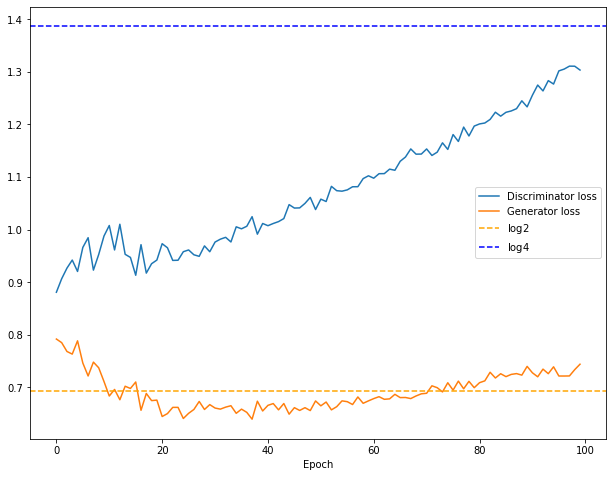

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])
plt.plot(D_losses, label="Discriminator loss")
plt.plot(G_losses, label="Generator loss")
ax.axhline(np.log(2), c='orange', ls='--', label='$\log{2}$')
ax.axhline(np.log(4), c='blue', ls='--', label='$\log{4}$')
plt.legend()
plt.xlabel("Epoch")
plt.show()

Apparently, they've stabilized around the desired optimal value! Does this mean that our network has converged to a *meaningful* solution, and that the generated data is indeed similar to the actual data?

Short answer: No. Long answer: ***also No, but in bold***. Let us start by analyzing the `fake_data` that we have stored, by first calculating the mean and standard deviation at each epoch, and then plotting these against the real values we have stored at the beginning of our notebook:

In [ ]:
means = [d.mean() for d in fake_data]
stds = [d.std() for d in fake_data]

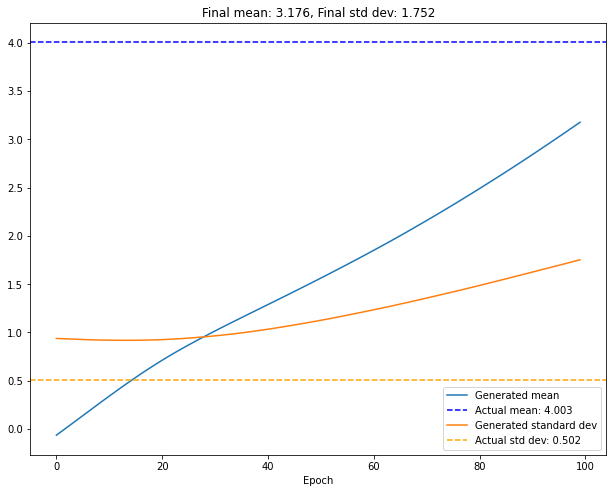

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])
plt.plot(means, label='Generated mean')
ax.axhline(y=actual_mean, c='blue', ls='--', label=f'Actual mean: {actual_mean:.3f}')
plt.plot(stds, label='Generated standard dev')
ax.axhline(y=actual_std, c='orange', ls='--', label=f'Actual std dev: {actual_std:.3f}')
plt.xlabel("Epoch")
plt.title(f"Final mean: {means[-1]:.3f}, Final std dev: {stds[-1]:.3f}")
plt.legend()
plt.show()

We can see that the mean is getting close to the `actual_mean`, but the values of the standard deviation aren't improving; indeed, they seem to be diverging from `actual_std`. In short, we haven't really obtained the actual distribution, as $p_{g}$ is still far away from $p_\text{data}$, i.e., we've **failed to converge**. More on this can be read in Appendix B, though this effect is more drastic for images.

As a conclusion, a higher/lower loss is not really correlated with the *quality* of our generated data. This was one of the reasons why [WGAN](https://arxiv.org/abs/1701.07875) was such an important paper, as they showed that their change in the loss function leads to a more intuitive correlation between the loss and image quality. I hope that you have the time to read it, should you have the time of course. Honestly, not many changes are needed in order to turn the GAN we have created above into a WGAN, but we will leave that for another time.

# Results: Animating the Training

Let's explore the fruits of our hard work in a more fun way. We can of course go to the `Files` on the left and inspect each individual disribution plot, or we can do something more interesting and make an animation with these files.

We will use [`ffmpeg`](https://www.ffmpeg.org/) to grab all the training images in `./animation` in order to make a video of the training process and save it as `./training_video.mp4`. Perhaps the only parameter you can change is `-framerate 20`, as this will control the fps of the training video, so I leave this up to you:

In [ ]:
!ffmpeg -loglevel quiet -y -framerate 20 -i ./animation/g_distr_epoch%3d.png -c:v libx264 -profile:v high -crf 20 -pix_fmt yuv420p training_video.mp4

`-loglevel quiet` will suppress the output, which can be quite wordy and uninteresting at times. However, don't use it when starting new projects, as the error outputs will not be uncommon. 

The `-y` flag at the beginning will simply overwrite any other file with the same name, which is useful if you run many times the above code when testing different parameters, hyperparameters, architectures, etc. Another option is for you to simply give different names to each training, but to each their own. 

To obtain a GIF, we can simply use this generated MP4 file:

In [ ]:
!ffmpeg -loglevel quiet -y -i training_video.mp4 training_gif.gif

If you do not wish to meddle too much with `ffmpeg` and prefer to remain in `Python`, you could also try installing [`ffmpeg-python`'](https://github.com/kkroening/ffmpeg-python) via `!pip install ffmpeg-python`. For example, to recreate the previous cell, you could change it to:

```py
import ffmpeg
ffmpeg.input('training_video.mp4').output('training_gif.gif').run(capture_stdout=True, capture_stderr=True)
```

In either case, we can then download the generated video or GIF to our local machine to watch it, or simply display it in the notebook like so:

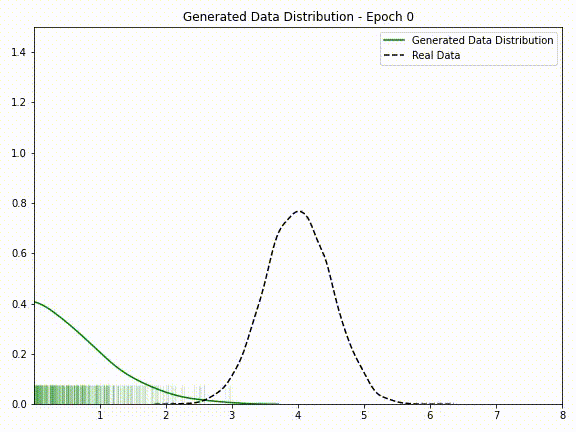

In [ ]:
from IPython.display import display, Image

with open('./training_gif.gif', 'rb') as f:
    display(Image(data=f.read(), format='png'))

We can see in a more visual way what we already plotted and discussed above: the mean of the generated data is getting closer to the real one, but the standard deviation is actually increasing. Bad news! We need better hyperparameters in order to successfully mimic the real data.

> Now, you can find in the `Files` menu to the left the relevant images, video and GIF. Save whichever you wish to save to your local machine, or upload to your Google Drive via running in a cell:
 ```python
from google.colab import drive
drive.mount('/content/gdrive/')
```
or simply click the button **Mount Drive** on the top left. For more steps regarding mounting Google Drive on Colab, follow [this guide](https://medium.com/@ml_kid/how-to-save-our-model-to-google-drive-and-reuse-it-2c1028058cb2) 

## Saving and Loading the Models

Of course, assuming we are satisfied with our training, we can just save our models like so:

In [ ]:
torch.save(generator.state_dict(), './trained_g.pth')
torch.save(discriminator.state_dict(), './trained_d.pth')

It is best to save the model's `state_dict()` instead of the entire model, as per `PyTorch`'s [best practices](https://pytorch.org/docs/stable/notes/serialization.html). 

To resume from this checkpoint in order to continue training or generate new values, we can load each model like so (note that `hidden_dim` must match to the one you had in your saved `.pth` file).

In [ ]:
g = Generator(hidden_dim=15)
g.load_state_dict(torch.load('./trained_g.pth'))

<All keys matched successfully>

In [ ]:
d = Discriminator(hidden_dim=25)
d.load_state_dict(torch.load('./trained_d.pth'))

<All keys matched successfully>

For a more detailed review on this subject, [follow this tutorial](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

# **Tasks**

***Work in groups of up to 4 students***

***Deadline: April 22nd at midnight.***

For the following, **make sure you are starting with an untrained Generator and Discriminator**. One way to do this is to run all the cells from the top or, when in doubt, restart the kernel altogether. Each exercise is worth 0.5 points.

1. Clearly, our training has failed to replicate $p_\text{data}$. What changes in parameters and hyperparameters will make it easier for our network to approximate $p_\text{data}$? 

 In your report, I expect you try variations in at least the following parameters/hyperparameters:
 * The number of epochs
 * The latent space dimension $|\mathcal{Z}|$. Above, we used 5-dim, perhaps a lower or higher value will be more useful.
    > *Note*: [StyleGAN](https://github.com/NVlabs/stylegan)/[StyleGAN2](https://github.com/NVlabs/stylegan2)/[StyleGAN3](https://github.com/NVlabs/stylegan3) have latent spaces with size $|\mathcal{Z}|=512$ (plus an intermediate latent space $\mathcal{W}$, but this is beyond the point); can you infer why? On another direction: do you think sizes these large are necessary?
 * More/less hidden neurons for the Generator and Discriminator. 
    > *Clue*: Do you think it's benefitial for the generator $G$ if the discriminator $D$ is always *stronger* (i.e., more hidden layers, more neurons per layer, more complex architecture, etc.) when compared to $G$? What do your experiments tell you?
 * How many times you train the Discriminator vs how many times you train the Generator per epoch: `d_repeats`.
 * A higher/lower learning rate, perhaps even different learning rates for each netowrk
 * A smaller/larger batch size
 * Try a different weight initialization (or none at all). You can find the default initialization for the layers in `PyTorch` [here](https://discuss.pytorch.org/t/whats-the-default-initialization-methods-for-layers/3157).

 Report all trials you perform in the form of graphs, training GIF, final plot of the distribution, however you so choose.
2. Choose one of the following *harder* distributions for $p_\text{data}$ (your training dataset) and find the necessary parameters and hyperparameters in order to mimick it, the same as above. Please do so starting from the `""" TODO..."""` cell below. 
 
 You don't need to report every iteration that you do, just the final set of parameters and hyperparameters that allowed you to correctly imitate the selected data distribution. Reporting the training GIF of this set of parameters, hyperparameters, network architecture, etc. is sufficient here.

     > *Clue*: For some of these distributions, there is a **theoretical** value for the mean and standard deviation. You can calculate these values and use them in your trials in order to ensure you are indeed converging to the desired distribution.

### [Laplace Distribution](https://en.wikipedia.org/wiki/Laplace_distribution) $p_{\text{data}}=\text{Laplace}(\mu, b)$

In [ ]:
class LaplaceDistribution:
    def __init__(self, loc=3.0, scale=0.3):
        self.loc = torch.tensor([loc])
        self.scale = torch.tensor([scale])

    def sample(self, N, seed=42):
        # Set the seed for reproducibility:
        torch.manual_seed(seed)
        m = torch.distributions.Laplace(loc=self.loc, scale=self.scale)
        samples = m.sample([N])
        return samples

In [ ]:
data = LaplaceDistribution(loc=3.0, scale=0.3).sample(10000)

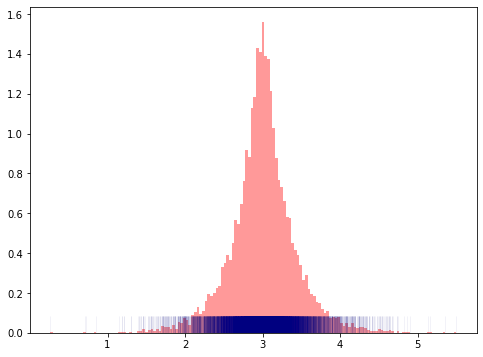

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(data, kde=False, rug=True, bins=150,
             norm_hist=True, hist_kws={'color': 'red'},
             rug_kws={'alpha': 0.05, 'color': 'navy'})
plt.show()

### [Half Normal Distribution](https://en.wikipedia.org/wiki/Half-normal_distribution)

In [ ]:
class HalfNormalDistribution:
    def __init__(self, scale=0.75):
        self.scale = torch.tensor([scale])

    def sample(self, N, seed=42):
        # Set the seed for reproducibility:
        torch.manual_seed(seed)
        m = torch.distributions.HalfNormal(scale=self.scale)
        samples = m.sample([N])

        return samples

In [ ]:
data = HalfNormalDistribution(scale=0.75).sample(10000)

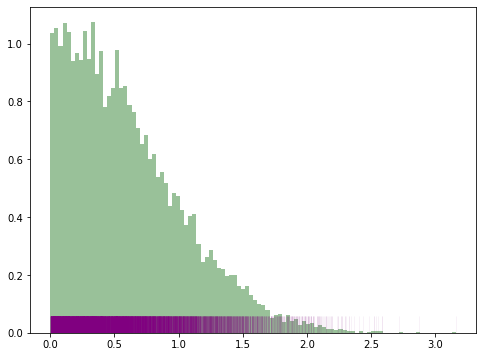

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(data, kde=False, rug=True, bins=100,
             norm_hist=True, hist_kws={'color': 'darkgreen'},
             rug_kws={'alpha': 0.05, 'color': 'purple'})
plt.show()

### [Petit Prince Distribution](https://66.media.tumblr.com/tumblr_lzf2o3epcz1qkww7to1_400.jpg)

In [ ]:
class PetitPrinceDistribution:
    def __init__(self, mu1=4.0, sigma1=1.5, mu2=0.6, sigma2=1.35):
        self.mu1 = torch.tensor([mu1])
        self.sigma1 = torch.tensor([sigma1])
        self.mu2 = torch.tensor([mu2])
        self.sigma2 = torch.tensor([sigma2])

    def sample(self, N, seed=42):
        # Set the seed for reproducibility:
        torch.manual_seed(seed)
        # Define the distribution:
        m1 = torch.distributions.normal.Normal(loc=self.mu1, scale=self.sigma1)
        m2 = torch.distributions.normal.Normal(loc=self.mu2, scale=self.sigma2)
        samples = torch.cat((m1.sample([N//2]), m2.sample([N-N//2])), 0)
        return samples

In [ ]:
data = PetitPrinceDistribution().sample(N=10000)

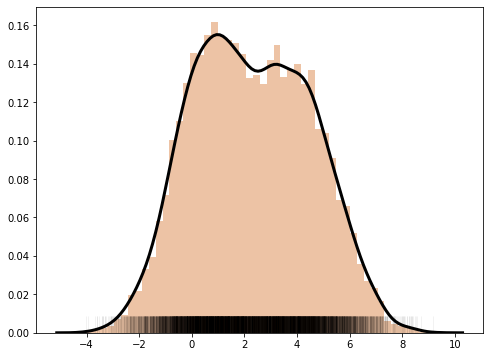

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(data, norm_hist=True, rug=True, bins=50,
             kde_kws={'color': 'k', 'linewidth': 3},
             hist_kws={'color': 'chocolate'},
             rug_kws={'alpha': 0.05, 'color': 'k'})
plt.show()

In [ ]:
"""
TODO: Exercise 2, select your data distribution, define your Generator, Discriminator,
parameters and hyperparameters. Show the GIF of your training as above, so make 
sure to change the root where you store these images when using `plot_distribution`
"""

'\nTODO: Exercise 2, select your data distribution, define your Generator, Discriminator,\nparameters and hyperparameters. Show the GIF of your training as above, so make \nsure to change the root where you store these images when using `plot_distribution`\n'

# Further Resources

* [*GAN*](http://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf), I. Goodfellow-et-al, 2014.
    * [*Google's GAN Course*](https://developers.google.com/machine-learning/gan)
    * [*Coursera's GAN Specialization*](https://www.coursera.org/specializations/generative-adversarial-networks-gans), S. Zhou, E. Zhou, E. Zelikman
    * [*Deep Learning*](https://www.deeplearningbook.org), Goodfellow-et-al, 2016, MIT Press (specifically, Ch. 20, [*Deep Generative Models*](https://www.deeplearningbook.org/contents/generative_models.html), pp. 696-699)
    * [*Improved Techniques for Training GANs*](https://arxiv.org/abs/1606.03498), T. Salimans-et-al, 2016
    * [*NIPs 2016 Tutorial: GANs*](https://arxiv.org/abs/1701.00160), I. Goodfellow, NIPs 2016; check the [recorded video](https://youtu.be/HGYYEUSm-0Q) of the event as well
    * [*GAN Lab*](https://poloclub.github.io/ganlab/), M. Kahng-et-al, 2018. 2D GAN that can be trained on the browser (using [TensorFlow.js](https://www.tensorflow.org/js/)).
* [*DCGAN*](https://arxiv.org/abs/1511.06434), A. Radford-et-al, 2015.
    * [*GAN Hacks*](https://github.com/soumith/ganhacks), S. Chintala-et-al, 2016.
    * [*DCGAN Tensorflow tutorial*](https://www.tensorflow.org/tutorials/generative/dcgan)
    * [*Deconvolution and Checkerboard Artifacts*](https://distill.pub/2016/deconv-checkerboard/), A.Odena-et-al, 2016 (particularly important for DCGAN and beyond).
* [*WGAN*](https://arxiv.org/abs/1701.07875), M. Arjovsky-et-al, 2017.
    * [*From GAN to WGAN*](https://lilianweng.github.io/lil-log/2017/08/20/from-GAN-to-WGAN.html), L. Weng, 2017. 
* [*StyleGAN*](https://arxiv.org/abs/1812.04948)
    * [*Official `TensorFlow` implementation*](https://github.com/NVlabs/stylegan)
    * https://thisvesseldoesnotexist.com
    * [*Making Anime Faces with StyleGAN*](https://www.gwern.net/Faces), G. Branwen, 2019 (fun blog, but especially useful if you wish to start with SOTA GANs and their training specifics).
* [*StyleGAN2*](https://arxiv.org/abs/1912.04958)
    * [*Official `TensorFlow` implementation*](https://github.com/NVlabs/stylegan2)
    * [*Colab notebook*](https://colab.research.google.com/drive/1ShgW6wohEFQtqs_znMna3dzrcVoABKIH)
    * Works best if the dataset is aligned (e.g., for faces: eyes, mouth, nose in the same position...)
    * https://www.thispersondoesnotexist.com/
    * https://www.thiswaifudoesnotexist.net/
* [*StyleGAN2-ADA*](https://arxiv.org/abs/2006.06676)
    * [Official `PyTorch` implementation](https://github.com/NVlabs/stylegan2-ada-pytorch) (a bit faster to train vs. the `TensorFlow` one)
    * Meant to be used for small datasets, e.g., on the order of 10^3
* [*StyleGAN3*](https://arxiv.org/abs/2106.12423)
    * [Official `PyTorch` implementation](https://github.com/NVlabs/stylegan3)
    * Meant as a step towards generating animation, as well as removing the need to align the datasets (with the configs having translational and rotational equivariances)
* [BigGAN](https://arxiv.org/abs/1809.11096)
    * [*Colab notebook*](https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/biggan_generation_with_tf_hub.ipynb) (impossible to train your own from scratch, so only pretrained models exist)
    * [*Art Breeder*](https://artbreeder.com/), J. Simon, 2018.
* **Beyond...**
    * [*Are GANs Created Equal? A Large-Scale Study*](https://arxiv.org/abs/1711.10337), M. Lucic-et-al, 2017.
    * [*Generative Models*](https://github.com/wiseodd/generative-models), A. Kristiadi, 2018. A collection of many generative models (GANs and VAEs included), coded in `PyTorch` and `TensorFlow`.
    * Make your own [<del>1D</del> *2D GAN*](https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/)! I digress with the author on the name of the project: while the function is indeed one-dimensional, the data you are feeding to the GAN is in fact two-dimensional (points in 2D space), hence my renaming.
    * [*Open Questions About GANs*](https://distill.pub/2019/gan-open-problems/), A. Odena, 2019.
    * [*A Review on GANs: Algorithms, Theory and Applications*](https://arxiv.org/abs/2001.06937), J. Gui-et-al, 2020. This is the paper you must read if you want a quick overview of the last ~6 years of GAN history.

# Appendix A: On sampling from the latent space

Once we have a trained Generator, we usually discard the Discriminator (unless, of course, if you have some interesting ideas like [Robbie Barrat](https://twitter.com/videodrome/status/1158419262463258624)). With it, we can then simply pass up some latent vectors and examine the generated output, like so:

In [ ]:
with torch.no_grad():
    # We generate 10 latent vectors and feed them to the generator
    samples = generator(get_latents(N=10, latent_dim=latent_dim)).detach().cpu()

# samples will be 10 one-dimensional vectors that should follow the distribution of 
# our data distribution:
print(samples)

tensor([[4.2638],
        [3.9388],
        [3.5460],
        [2.5068],
        [0.8286],
        [3.4947],
        [3.6732],
        [1.2174],
        [2.0097],
        [2.5828]])


This is basically how you generate new data, which you are now confident that follows the desired distribution (should convergence has indeed occured).

> As a side note, while `var.cpu().detach()` and `var.detach().cpu()` might look similar, [there is a specific difference between them](https://discuss.pytorch.org/t/should-it-really-be-necessary-to-do-var-detach-cpu-numpy/35489/8): if `var` requires gradient tracking, then the former will construct the autograd edge on `cpu`, and it will then be destroyed, whereas the latter doesn't do this. Since this is a relatively fast operation, not much is lost, but it's best to unnecessarily avoid wasting resources whenever possible.

For example, to create those classical interpolation videos in the latent space, you typically generate two latent vectors and make an interpolation between them, generating an image at every step. Let's look at an example of this:

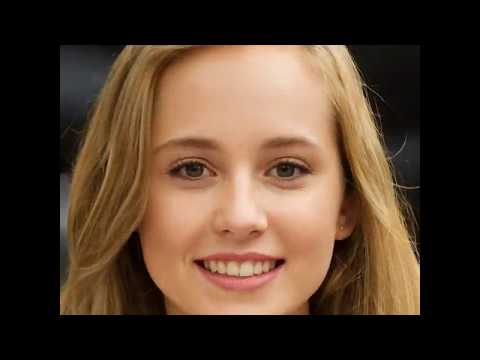

In [ ]:
YouTubeVideo('6E1_dgYlifc')

I should note that, if your latent space is high-dimensional like, say $100$, then you **shouldn't** do a linear interpolation between two latent vectors. ***This is a common error that many do even today.*** This is due to the well-known [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality), of which we do not escape here. Indeed, for the $100$-dimensional latent space mentioned before, all of the mass of the Gaussian distribution would lay in an outer shell, not in the inner sphere!

To better illustrate this, let's take an [hypersphere](https://en.wikipedia.org/wiki/Hypersphere) of radius $R$ in $n$ dimensions, which has an inner shell of radius $r$. In the following image, we show the cases for $n=2$ and $n=3$:

![shell sphere](https://upload.wikimedia.org/wikipedia/commons/0/07/Kugelschale.svg "shell sphere")

An equivalent formulation of this is that we have a hyper-orange and we're going to peel it. How much of the total volume are we going to lose when we throw away the peel? 

For $n=2$ we'll have to calculate areas, so let's see what percentage of the total area is comprised of *peel*:

$$\frac{\pi R^2 - \pi r^2}{\pi R^2} = 1-(r/R)^2$$

For $n=3$, we'll have volumes, so we do the same as above:

$$\frac{\frac{4}{3}\pi R^3 - \frac{4}{3}\pi r^3}{\frac{4}{3}\pi R^3} = 1-(r/R)^3$$

For $n$ dimensions, this will be the [hyper volume](https://en.wikipedia.org/wiki/Volume_of_an_n-ball), so:

$$ \frac{V_n(R)-V_n(r)}{V_n(R)} = 1-\frac{\pi^{n/2}(r)^n/\Gamma(1+n/2)}{\pi^{n/2}(R)^n/\Gamma(1+n/2)} = 1 - (r/R)^n $$

with $\Gamma$ being the [Gamma function](https://en.wikipedia.org/wiki/Gamma_function) (think of it as a generalization of the factorial). Let's say the peel of our orange is somewhat thin, so that $r=0.95 R$, then we would get the following results: 

| Dimension | Ratio of peel to total volume |
|---|---|
| $n=2$ | 9.75% |
| $n=3$ | 14.26% |
| ... | ... |
|$n=100$ | 99.41% |

That is, in 100 dimensions, $99.41\%$ of the hypersphere's volume lies in its outer shell, when $r=0.95R$. This is not an intuitive result, as in our everyday life, we don't lose the majority of the orange when we peel it! A similar argument can be made with [hypercubes](https://en.wikipedia.org/wiki/Hypercube), which is relevant when our latent vectors are drawn from the Uniform distribution. See a relevant discussion [here](https://datascience.stackexchange.com/a/27390).

Coming back to GANs, almost all of the datapoints will lie in the outer shell of the hypersphere whenever we sample from a Normal or Uniform distribution. Reiterating, you should never do linear interpolation ([lerp](https://en.wikipedia.org/wiki/Linear_interpolation)) between two random latent vectors. Instead, you should do a spherical interpolation ([slerp](https://en.wikipedia.org/wiki/Slerp)) between them (hence Tip 3 in [S. Chintala's GAN Hacks](https://github.com/soumith/ganhacks)). Follow a much relevant discussion [here](https://github.com/soumith/dcgan.torch/issues/14#issuecomment-199171316), as well as some starter code in how to do this spherical interpolation in `Python`.

# Appendix B: Why is it so hard to train a GAN?

As you have seen, the process of training a GAN can be quite straightforward: get a dataset, define your generator and discriminator, set up your training loop *et voila*. Were it so easy. Remember that both networks are playing a game, and they must thus reach a [Nash equilibrium](https://en.wikipedia.org/wiki/Nash_equilibrium). 

This translates to a myriad of problems, perhaps some of the most famous being **mode collapse** and **convergence failure**. Let us discuss these two briefly:

### Mode Collapse

**Mode collapse** refers to the phenomena when $G$ generates one or a few different samples or modes, no matter the input $z$. How does this happen?

In as few words as possible, what happens is that since we keep our Discriminator $D$ fixed when training the Generator $G$, $G$ thinks there exists a single point $x^{*}=G(z)=\arg\max_x D(x)$ that is the optimal to generate, regardless of the input $z$. After all, our objective function doesn't have a way to tell $G$ to *diversify* its output.

Do note that even SOTA GANs can suffer from mode collapse, even after applying all the possible tricks in the book, like changes in the loss function, more complicated architectures, etc. For example, take a look at an interpolation video of collapsed StyleGAN2 that I've recently trained with circa 12k images of the details of [huipils](https://en.wikipedia.org/wiki/Huipil) from Guatemala (my home country) and Mexico:

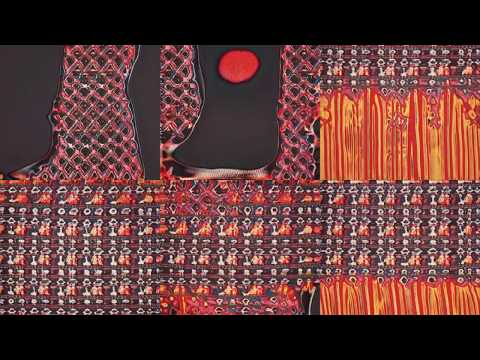

In [ ]:
YouTubeVideo('5Iy60yEwYiw') 

Although it is tempting to say that perhaps there isn't enough training data, the next video shows the same model trained for far longer (almost twice as long), with minor signs of mode collapse (I hope you can identify them):

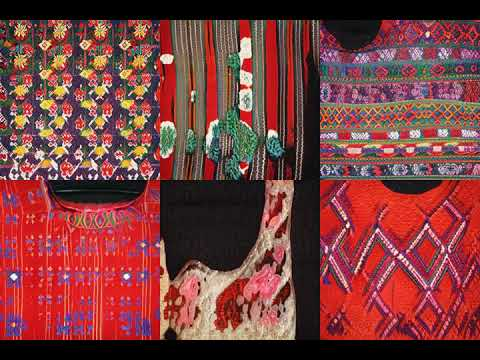

In [ ]:
YouTubeVideo('t9fv4AAt6lw') 

If you have **total collapse**, that is, for any input, you obtain the *same* output, then you must restart your training. This is because, while $D$ will be able to identify this mode as the fake one and this be reflected in the signal it transmits to $G$ for updating its parameters, this signal will be the same for all latent vectors in the batch. As such, they will *all* move in the same direction, producing a different output, but the same for all elements in the batch, so we're still at total collapse.

Perhaps the best way to guarantee mode collapse is by not having a complex enough latent space. This will be hard to achieve in this notebook due to the relatively easy dataset we are using, but you can get this in the [DCGAN tutorial](https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html). In it, the authors set the latent dimension to `nz=100`, so if you set `nz=1` for example, you are more than likely to get mode collapse.

### Convergence Failure

**Convergence failure** is the most common failure pitfall in training a GAN. In it, $G$ will simply produce garbage output that is easily recognized by $D$, no matter how much you train your network. If your learning rate is too high, or perhaps the architecture of both $G$ and $D$ is too simple for the data at hand, you will see instances of this failure mode. Therefore, a careful selection of the hyperparameters is warranted, as in any deep learning training loop.

It is not hard to imagine what happens when a GAN fails to converge. The following image shows such a case, even after training the GAN for $450$ epochs:

![Convergence failure](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/07/Sample-of-100-Generated-Images-of-a-Handwritten-Number-8-at-Epoch-450-from-a-GAN-that-has-a-Convergence-Failure-via-Combined-Updates-to-the-Discriminator.png "Convergence failure")
[Image Source](https://machinelearningmastery.com/practical-guide-to-gan-failure-modes/)

For a more detailed summary of these caveats, see Samuel Barnett's dissertation [*Convergence Problems with GANs*](https://arxiv.org/abs/1806.11382). 

# Appendix C: Evaluating a GAN 

In this notebook, we have been plotting the distribution (or at least, a fitted KDE) of the generated data to aid in our understanding whether or not the generated distribution has converged to the real data distribution. While certainly useful for this low dimension sample, it is extremely unreliable to do this in higher dimensions (i.e., images), so don't try this method when evaluating images generated by a GAN!

We must instead use other methods of evaluating whether or not a GAN is *correctly* generating images. Now, this is a tricky situation, as image generation can be simply too subjective, but there are some metrics that have been proposed and are useful to benchmark the image generation capabilities of the current SOTA GANS. 

We will mention two of the most used ones, Inception Score and Fréchet Inception Distance, but note that these metrics aren't set on stone. We won't delve too deep into their details, as they are plenty, so instead I redirect you to, e.g., [Neal Jean's blog](https://nealjean.com/ml/frechet-inception-distance/) if you wish a more detailed explanation, or to the linked papers in each title.

## [Inception Score](https://arxiv.org/abs/1606.03498)

The **Inception Score** (IS) was developed as a way to independently judge the quality of generated images by a GAN. It is a real number that was meant to replace human evaluators, as it was done in some of the first papers on the subject. 

The IS is meant to measure two things simultaneously:

* That the generated images are **diverse** or have variety
* That each generated image has a **clear object** or that it's not blurry

As such, the higher the IS, the better, with the lowest possible value being $1.00$ and the highest being the number of classes that the classification model has. Take a look, for example, at the [SOTA IS on the CIFAR-10 dataset](https://paperswithcode.com/sota/image-generation-on-cifar-10): the highest possible value is thus $10.0$ and as of now the SOTA is [$10.020$](https://arxiv.org/abs/2006.06676). A final point is that the IS should be calculated usinig a high number of generated images such as $50,000$ as noted by [Salimans-et-al, 2016](https://arxiv.org/abs/1606.03498).

However, the IS has a downfall: if used as a parameter to optimize, rather as a rough guide for image generation, then we obtain adversarial examples rather than meaningful images. This was shown by [Barratt & Sharma, 2018](https://arxiv.org/abs/1801.01973), where they achieve a high IS but nonsensical outputs, from a purely aesthetic point of view. See the Figures 1 and 2 of their paper.

## [Fréchet Inception Distance](https://arxiv.org/abs/1706.08500)

Another caveat from the IS was that the generated images aren't compared against real images, so there is no way of telling whether the GAN is actually generating images on the target domain. As such, the **Fréchet Inception Distance** (FID) was born. 

The FID seeks to measure the statistics between the generated and real images, with these being calculated via the activations of the [Inception v3](https://arxiv.org/abs/1512.00567) model and using the [Fréchet distance](https://en.wikipedia.org/wiki/Fr%C3%A9chet_distance). 

Hence, the lower the FID, the better, which will correspond to more similar generated and real images. For example, we can see a graph of the [SOTA FID on the FFHQ dataset](https://paperswithcode.com/sota/image-generation-on-ffhq), where the current lowest FID is now [$2.840$](https://arxiv.org/abs/1912.04958v2).

For practice, you could try to implement both of these metrics in your trials for Exercise 1 and 2 and let these guide on how well your changes are. You can skip using the pre-trained models of course, and perhaps only use the calculated mean, standard deviation, covariance (variance) for this one-dimensional case. These metrics are beyond the scope of this exercise, so we won't be delving too much in this area.